In [27]:
#10/21/2024 
#This project builds multiple ML models using housing data from Kaggle to find an optimal model for predicting housing prices. 
#Neural Networks, Linear Regression, SVM, and Random Forests are used
#Much more work can be done to furter optimize the models, and further EDA can also be done. 

In [28]:
import pandas as pd
import numpy as np 
import seaborn as sns
import statistics as stat
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn import svm
from sklearn.svm import SVC

In [29]:
import warnings 
warnings.filterwarnings("ignore")

In [30]:
df = pd.read_csv("Housing.csv") 
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.00,2,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


In [31]:
columns = df.columns
print(columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [32]:
#Need to drop insignificant variables
#Dropping some location related variables as well
df_predictors = df.drop(['id', 'date', 'price', 'zipcode', 'lat', 'long'], axis = 1) 
df_predictors

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,2,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,1340,5650
1,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,1690,7639
2,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,2720,8062
3,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,1360,5000
4,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,1530,1509
21609,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,1830,7200
21610,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,1020,2007
21611,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,1410,1287


In [33]:
prices = df['price']
prices

0       231300.00
1       538000.00
2       180000.00
3       604000.00
4       510000.00
           ...   
21608   360000.00
21609   400000.00
21610   402101.00
21611   400000.00
21612   325000.00
Name: price, Length: 21613, dtype: float64

In [34]:
#EDA 

In [35]:
#Check for missing values
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [36]:
average_price = stat.mean(prices)
round(average_price, 2)

540088.58

In [37]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) #2 decimal points 
df[["price"]].describe()

,price
count,21613.00
mean,540088.58
std,367126.83
min,75000.00
25%,321950.00
50%,450000.00
75%,645000.00
max,7700000.00


Text(0.5, 1.0, 'Price Distribution Plot')

<Figure size 1000x1000 with 0 Axes>

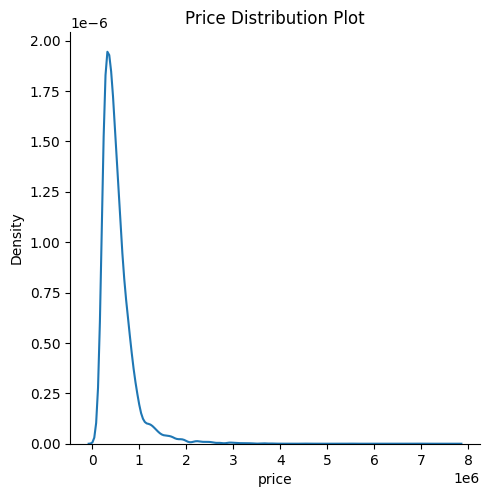

In [38]:
#Price Displot
plt.figure(figsize = (10,10)) 
sns.displot(prices, kind = 'kde')
plt.title("Price Distribution Plot")

Text(0.5, 1.0, 'Boxplot of Bedrooms vs Price')

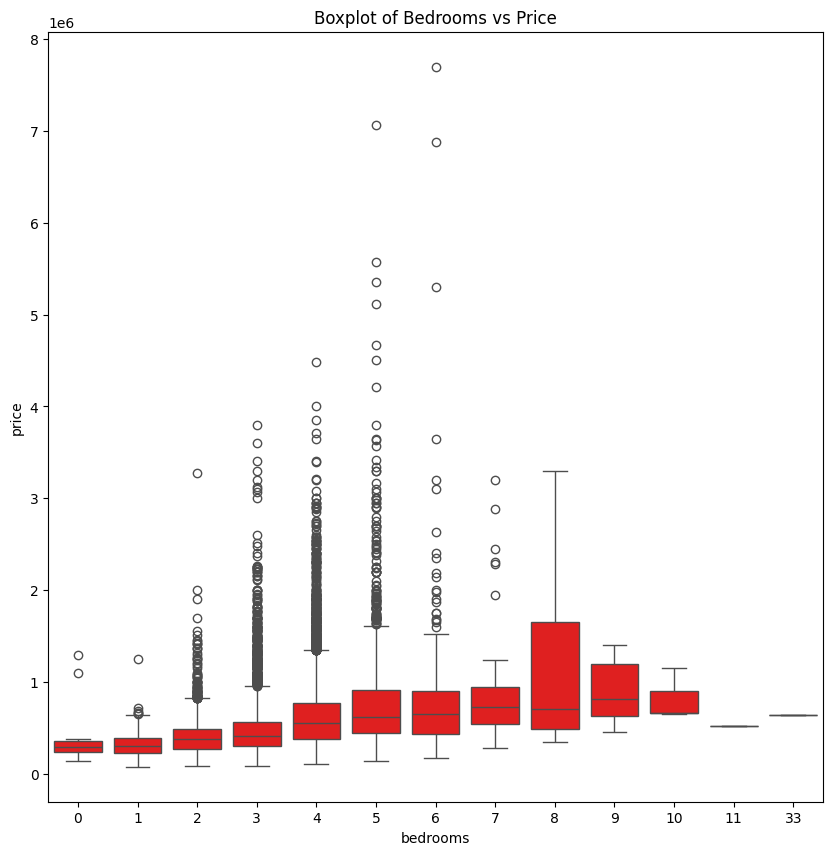

In [39]:
#Bedrooms vs Price Boxplot
plt.figure(figsize = (10,10)) 
sns.boxplot(x = 'bedrooms', y = 'price', data = df, color = 'red') 
plt.title("Boxplot of Bedrooms vs Price") 

Text(0.5, 1.0, 'Boxplot of Bathrooms vs Price')

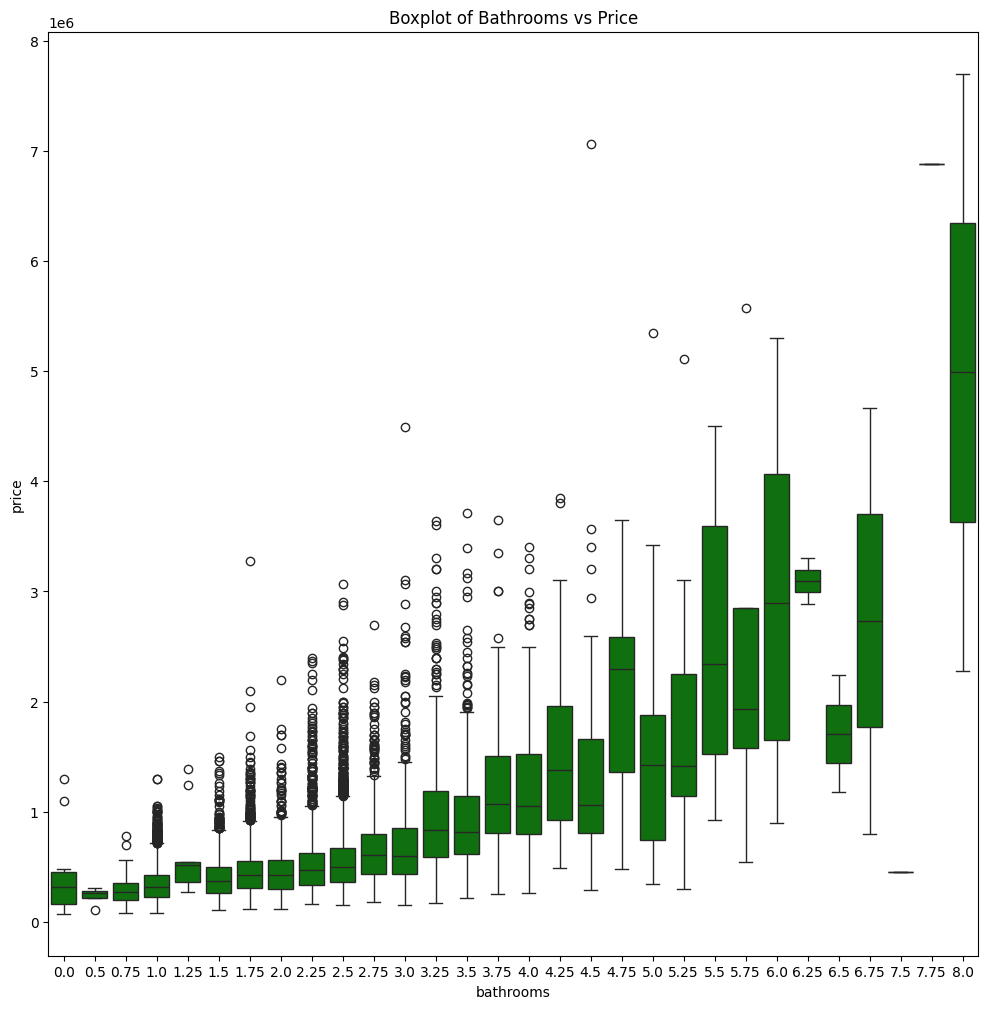

In [40]:
#Boxplot of Bathrooms vs Price
plt.figure(figsize = (12,12))
sns.boxplot(x = 'bathrooms', y = 'price', data = df, color = 'green') 
plt.title("Boxplot of Bathrooms vs Price")

Text(0.5, 1.0, 'Correlation Plot')

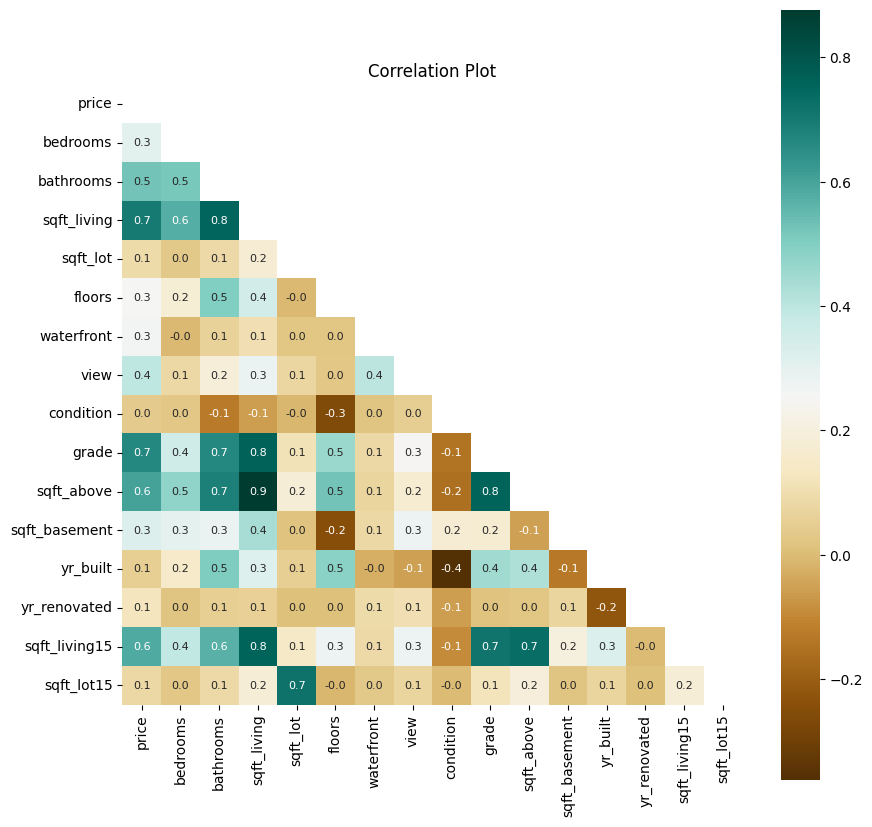

In [41]:
#Correlation Heatmap for all numeric variables
df_numeric = df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis = 1)
cor = df_numeric.corr()
upper_triangle = np.triu(cor) 
plt.figure(figsize = (10,10)) 
sns.heatmap(cor, cbar = True, square = True, fmt = ".1f", annot = True, annot_kws = {'size':8}, cmap = 'BrBG', mask = upper_triangle)
plt.title('Correlation Plot') 

In [42]:
#According to the Correlation Plot, these variables are the most correlated with price 
#sqft_living
#grade
#sqft_living15
#sqft_above

Text(0.5, 1.0, 'Floors Count Plot')

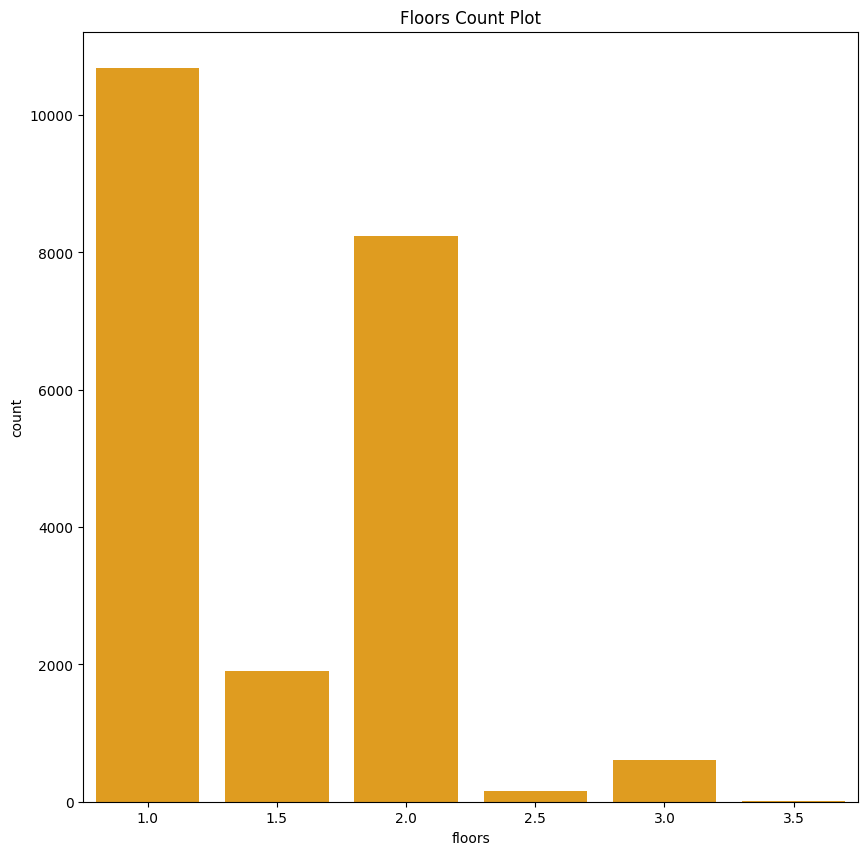

In [43]:
#Count plot for floors 
plt.figure(figsize = (10,10))
sns.countplot(x = 'floors', data = df, color = 'orange')
plt.title('Floors Count Plot') 

In [44]:
#Defining Train and Test Datasets
X = df_predictors
y = prices

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

In [45]:
#Models with all Predictors

In [46]:
#Linear Regression
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test) 
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.2891228576728066


In [47]:
#Random Forest Regressor 
RF = RandomForestRegressor()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.235527307298265


In [48]:
#SVM 
SVM = svm.SVR()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test) 
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))

MAPE: 0.4322675065015057


In [49]:
#Models with the significant features from the correlation plot 

In [50]:
df_sig = df_predictors[['bathrooms', 'sqft_living', 'grade', 'sqft_living15', 'sqft_above']]
df_sig

,bathrooms,sqft_living,grade,sqft_living15,sqft_above
0,1.00,1180,7,1340,1180
1,2.25,2570,7,1690,2170
2,1.00,770,6,2720,770
3,3.00,1960,7,1360,1050
4,2.00,1680,8,1800,1680
...,...,...,...,...,...
21608,2.50,1530,8,1530,1530
21609,2.50,2310,8,1830,2310
21610,0.75,1020,7,1020,1020
21611,2.50,1600,8,1410,1600


In [51]:
X_sig = df_sig 
y_sig = prices

In [52]:
X_sig_train, X_sig_test, y_sig_train, y_sig_test = train_test_split(X_sig, y_sig, train_size = 0.7, test_size = 0.3)

In [53]:
#Linear Regression with significant predictors
regr_sig = LinearRegression()
regr_sig.fit(X_sig_train, y_sig_train)
y_sig_pred = regr_sig.predict(X_sig_test) 
print("MAPE:", mean_absolute_percentage_error(y_sig_test, y_sig_pred))

MAPE: 0.3386025277463634


In [54]:
#Random Forest Regressor with significant predictors 
RF_sig = RandomForestRegressor()
RF_sig.fit(X_sig_train, y_sig_train)
y_sig_pred = RF_sig.predict(X_sig_test)
print("MAPE:", mean_absolute_percentage_error(y_sig_test, y_sig_pred))

MAPE: 0.3160339553322207


In [55]:
#SVM with significant predictors 
SVM_sig = svm.SVR()
SVM_sig.fit(X_sig_train, y_sig_train)
y_sig_pred = SVM_sig.predict(X_sig_test) 
print("MAPE:", mean_absolute_percentage_error(y_sig_test, y_sig_pred))

MAPE: 0.42601848281012117


In [56]:
#SVM across all predictors and significant predictors doesn't perform well compared to LR and RF

In [57]:
#Neural Network 

In [58]:
#Data Preprocessing to turn X and y into np arrays to then turn into tensors 
np_X = df_predictors.values
np_y = prices.values

In [59]:
#Turning X and y into tensors for the neural network 
X_tens = torch.tensor(np_X, dtype = torch.float32) 
y_tens = torch.tensor(np_y, dtype = torch.float32).reshape(-1, 1) 

In [60]:
print(X_tens.shape, y_tens.shape)

torch.Size([21613, 15]) torch.Size([21613, 1])


In [61]:
nn_model = nn.Sequential(
    nn.Linear(15, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

print(nn_model) 

Sequential(
  (0): Linear(in_features=15, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=1, bias=True)
)


In [62]:
criterion = nn.MSELoss()
optimizer = optim.Adam(nn_model.parameters(), lr = 0.00001) 

In [63]:
X_tens_train, X_tens_test, y_tens_train, y_tens_test = train_test_split(X_tens, y_tens, train_size = 0.7, test_size = 0.3) 

In [64]:
#Incorporate batches into the neural networks

In [65]:
epochs = 10000
for epoch in range(epochs):
    nn_model.train()

    y_train_pred = nn_model(X_tens_train)

    train_loss = criterion(y_train_pred, y_tens_train) 

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    nn_model.eval()
    with torch.no_grad():
        y_test_pred = nn_model(X_tens_test)
        test_loss = criterion(y_test_pred, y_tens_test) 

    if (epoch + 1) % 100 == 0: 
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch [100/10000], Train Loss: 420375592960.0000, Test Loss: 440871157760.0000
Epoch [200/10000], Train Loss: 420301963264.0000, Test Loss: 440794808320.0000
Epoch [300/10000], Train Loss: 420221222912.0000, Test Loss: 440710823936.0000
Epoch [400/10000], Train Loss: 420124033024.0000, Test Loss: 440609472512.0000
Epoch [500/10000], Train Loss: 420001251328.0000, Test Loss: 440480858112.0000
Epoch [600/10000], Train Loss: 419863134208.0000, Test Loss: 440337039360.0000
Epoch [700/10000], Train Loss: 419720495104.0000, Test Loss: 440188403712.0000
Epoch [800/10000], Train Loss: 419585458176.0000, Test Loss: 440048254976.0000
Epoch [900/10000], Train Loss: 419456024576.0000, Test Loss: 439914004480.0000
Epoch [1000/10000], Train Loss: 419295428608.0000, Test Loss: 439747280896.0000
Epoch [1100/10000], Train Loss: 419093643264.0000, Test Loss: 439537401856.0000
Epoch [1200/10000], Train Loss: 418897068032.0000, Test Loss: 439333421056.0000
Epoch [1300/10000], Train Loss: 418701410304.0000

In [66]:
#Neural Network with the significant predictors 

In [67]:
np_X_sig = df_sig.values
np_y = prices.values

In [68]:
X_sig_tens = torch.tensor(np_X_sig, dtype = torch.float32) 
y_tens = torch.tensor(np_y, dtype = torch.float32).reshape(-1, 1) 

In [69]:
print(X_sig_tens.shape, y_tens.shape)

torch.Size([21613, 5]) torch.Size([21613, 1])


In [70]:
X_sig_tens_train, X_sig_tens_test, y_sig_tens_train, y_sig_tens_test = train_test_split(X_sig_tens, y_tens, train_size = 0.7, test_size = 0.3) 

In [71]:
nn_model_sig = nn.Sequential(
    nn.Linear(5, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)
print(nn_model_sig) 

Sequential(
  (0): Linear(in_features=5, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=32, bias=True)
  (3): ReLU()
  (4): Linear(in_features=32, out_features=16, bias=True)
  (5): ReLU()
  (6): Linear(in_features=16, out_features=1, bias=True)
)


In [72]:
optimizer_2 = optim.Adam(nn_model_sig.parameters(), lr = 0.00001) 

In [73]:
epochs = 10000
for epoch in range(epochs):
    nn_model_sig.train()

    y_train_pred = nn_model_sig(X_sig_tens_train)

    train_loss = criterion(y_train_pred, y_sig_tens_train) 

    optimizer_2.zero_grad()
    train_loss.backward()
    optimizer_2.step()

    nn_model_sig.eval()
    with torch.no_grad():
        y_test_pred = nn_model_sig(X_sig_tens_test)
        test_loss = criterion(y_test_pred, y_sig_tens_test) 

    if (epoch + 1) % 100 == 0: 
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

Epoch [100/10000], Train Loss: 426685038592.0000, Test Loss: 425511190528.0000
Epoch [200/10000], Train Loss: 426655776768.0000, Test Loss: 425482158080.0000
Epoch [300/10000], Train Loss: 426618748928.0000, Test Loss: 425445654528.0000
Epoch [400/10000], Train Loss: 426576576512.0000, Test Loss: 425403875328.0000
Epoch [500/10000], Train Loss: 426529587200.0000, Test Loss: 425357312000.0000
Epoch [600/10000], Train Loss: 426478436352.0000, Test Loss: 425306456064.0000
Epoch [700/10000], Train Loss: 426422337536.0000, Test Loss: 425250586624.0000
Epoch [800/10000], Train Loss: 426360340480.0000, Test Loss: 425188982784.0000
Epoch [900/10000], Train Loss: 426294444032.0000, Test Loss: 425123610624.0000
Epoch [1000/10000], Train Loss: 426224713728.0000, Test Loss: 425054240768.0000
Epoch [1100/10000], Train Loss: 426150723584.0000, Test Loss: 424980774912.0000
Epoch [1200/10000], Train Loss: 426072211456.0000, Test Loss: 424902721536.0000
Epoch [1300/10000], Train Loss: 425988849664.0000

In [74]:
#Both Neural Networks have incredibly high training and test losses, so they may not be the best model for this data

In [75]:
#The Random Forest model using all predictors seems to be the most optimal model to make predictions. 